# <font color="purple" size="5">**About Yulu**</font>


<b>
Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.
</b>


## <font color="purple" size="5">**Business Problem**</font>

<b>The company wants to know:
* Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
* How well those variables describe the electric cycle demands</b>

## <font color="purple" size="5">**Customer Profiling** </font>
<table>
    <thead>
        <tr>
            <th>Column Name</th>
            <th>Description</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td><strong>datetime</strong></td>
            <td>Datetime of the bike rental</td>
        </tr>
        <tr>
            <td><strong>season</strong></td>
            <td>Season (1: spring, 2: summer, 3: fall, 4: winter)</td>
        </tr>
        <tr>
            <td><strong>holiday</strong></td>
            <td>Whether day is a holiday or not (extracted from <a href="http://dchr.dc.gov/page/holiday-schedule" target="_blank">DCHR Holiday Schedule</a>)</td>
        </tr>
        <tr>
            <td><strong>workingday</strong></td>
            <td>If the day is neither weekend nor holiday, it is 1, otherwise 0</td>
        </tr>
        <tr>
            <td><strong>weather</strong></td>
            <td>
                1: Clear, Few clouds, Partly cloudy<br>
                2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
                3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
                4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
            </td>
        </tr>
        <tr>
            <td><strong>temp</strong></td>
            <td>Temperature in Celsius</td>
        </tr>
        <tr>
            <td><strong>atemp</strong></td>
            <td>Feeling temperature in Celsius</td>
        </tr>
        <tr>
            <td><strong>humidity</strong></td>
            <td>Humidity percentage</td>
        </tr>
        <tr>
            <td><strong>windspeed</strong></td>
            <td>Wind speed in km/h</td>
        </tr>
        <tr>
            <td><strong>casual</strong></td>
            <td>Count of casual users</td>
        </tr>
        <tr>
            <td><strong>registered</strong></td>
            <td>Count of registered users</td>
        </tr>
        <tr>
            <td><strong>count</strong></td>
            <td>Total rental bikes including both casual and registered users</td>
        </tr>
    </tbody>
</table>


# <font color = 'purple'> 1. Defining Problem Statement and Analysing basic metrics: </font>
<b>Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary</b>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind,ttest_rel,ttest_1samp,chi2_contingency,chi2,f_oneway,levene,shapiro,kruskal,zscore
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.graphics.gofplots import qqplot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv('yulu.csv')


# <b> Basic data exploration: </b>

In [8]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [9]:
data.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [10]:
print(f"Shape:\n {data.shape}")
print("------------------------------------------------------------------------------")
print(f"Columns of this data set are:\n {data.columns}")
print("------------------------------------------------------------------------------")
print(f"Data types: \n{data.dtypes}")
print("------------------------------------------------------------------------------")


Shape:
 (10886, 12)
------------------------------------------------------------------------------
Columns of this data set are:
 Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')
------------------------------------------------------------------------------
Data types: 
datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object
------------------------------------------------------------------------------


In [11]:
# Converting datetime column into date time format
data['datetime'] = pd.to_datetime(data['datetime'])

# Converting categorical columns into category
cat_cols = ['season','holiday','workingday','weather']
for _ in cat_cols:
    data[_] = data[_].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: category(4), datetime64[ns](1), float64(3), int64(4)
memory usage: 723.7 KB


<font color = 'blue'>**Observation:**</font>

1. <b>The Dataset consists of 10886 rows and 12 columns</b>
2.
<table>
        <thead>
            <tr>
                <th>Column Name</th>
                <th>Description</th>
                <th>Data Type</th>
            </tr>
        </thead>
        <tbody>
             <tr>
                <td><strong>datetime</strong></td>
                <td>Datetime of the bike rental</td>
                <td>object</td>
            </tr>
            <tr>
                <td><strong>season</strong></td>
                <td>Season (1: spring, 2: summer, 3: fall, 4: winter)</td>
                <td>int64</td>
            </tr>
            <tr>
                <td><strong>holiday</strong></td>
                <td>Whether day is a holiday or not </a>)</td>
                <td>int64</td>
            </tr>
            <tr>
                <td><strong>workingday</strong></td>
                <td>If the day is neither weekend nor holiday, it is 1, otherwise 0</td>
                <td>int64</td>
            </tr>
            <tr>
                <td><strong>weather</strong></td>
                <td>
                    1: Clear, Few clouds, Partly cloudy<br>
                    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
                    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
                    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
                </td>
                <td>int64</td>
            </tr>
            <tr>
                <td><strong>temp</strong></td>
                <td>Temperature in Celsius</td>
                <td>float64</td>
            </tr>
            <tr>
                <td><strong>atemp</strong></td>
                <td>Feeling temperature in Celsius</td>
                <td>float64</td>
            </tr>
            <tr>
                <td><strong>humidity</strong></td>
                <td>Humidity percentage</td>
                <td>int64</td>
            </tr>
            <tr>
                <td><strong>windspeed</strong></td>
                <td>Wind speed in km/h</td>
                <td>float64</td>
            </tr>
            <tr>
                <td><strong>casual</strong></td>
                <td>Count of casual users</td>
                <td>int64</td>
            </tr>
            <tr>
                <td><strong>registered</strong></td>
                <td>Count of registered users</td>
                <td>int64</td>
            </tr>
            <tr>
                <td><strong>count</strong></td>
                <td>Total rental bikes including both casual and registered users</td>
                <td>int64</td>
            </tr>
        </tbody>
</table>


# **Statistical summary:**

In [14]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
datetime,10886,2011-12-27 05:56:22.399411968,2011-01-01 00:00:00,2011-07-02 07:15:00,2012-01-01 20:30:00,2012-07-01 12:45:00,2012-12-19 23:00:00,NaN
temp,10886.0,20.23086,0.82,13.94,20.5,26.24,41.0,7.79159
atemp,10886.0,23.655084,0.76,16.665,24.24,31.06,45.455,8.474601
humidity,10886.0,61.88646,0.0,47.0,62.0,77.0,100.0,19.245033
windspeed,10886.0,12.799395,0.0,7.0015,12.998,16.9979,56.9969,8.164537
casual,10886.0,36.021955,0.0,4.0,17.0,49.0,367.0,49.960477
registered,10886.0,155.552177,0.0,36.0,118.0,222.0,886.0,151.039033
count,10886.0,191.574132,1.0,42.0,145.0,284.0,977.0,181.144454


In [15]:
data.describe(include = 'category').T

,count,unique,top,freq
season,10886,4,4,2734
holiday,10886,2,0,10575
workingday,10886,2,1,7412
weather,10886,4,1,7192


In [16]:
for col in data.select_dtypes(np.number):
  mean = np.round(data[col].mean(),2)
  sd = np.round(data[col].std(),2)
  median = np.round(data[col].median(),2)
  minimum = data[col].min()
  maximum = data[col].max()
  q3 = np.percentile(data[col],75)
  q1 = np.percentile(data[col], 25)
  IQR = q3 - q1
  Upper = q3 + 1.5 * IQR
  Lower = q1 - 1.5 * IQR
  print(f"-----DESCRIPTIVE STATISTICS OF {col} COLUMN--------")
  print(f"Mean:{mean}")
  print(f"Standard deviation:{sd}")
  print(f"Median:{median}")
  print(f"Minimum:{minimum}")
  print(f"Maximum:{maximum}")
  print(f"25 Percentile:{q1}")
  print(f"75 Percentile:{q3}")
  print(f"Inter Quartile Range:{IQR}")
  print(f"Upper bound:{Upper}")
  print(f"Lower bound:{Lower}")
  print()

-----DESCRIPTIVE STATISTICS OF temp COLUMN--------
Mean:20.23
Standard deviation:7.79
Median:20.5
Minimum:0.82
Maximum:41.0
25 Percentile:13.94
75 Percentile:26.24
Inter Quartile Range:12.299999999999999
Upper bound:44.69
Lower bound:-4.51

-----DESCRIPTIVE STATISTICS OF atemp COLUMN--------
Mean:23.66
Standard deviation:8.47
Median:24.24
Minimum:0.76
Maximum:45.455
25 Percentile:16.665
75 Percentile:31.06
Inter Quartile Range:14.395
Upper bound:52.6525
Lower bound:-4.927500000000002

-----DESCRIPTIVE STATISTICS OF humidity COLUMN--------
Mean:61.89
Standard deviation:19.25
Median:62.0
Minimum:0
Maximum:100
25 Percentile:47.0
75 Percentile:77.0
Inter Quartile Range:30.0
Upper bound:122.0
Lower bound:2.0

-----DESCRIPTIVE STATISTICS OF windspeed COLUMN--------
Mean:12.8
Standard deviation:8.16
Median:13.0
Minimum:0.0
Maximum:56.9969
25 Percentile:7.0015
75 Percentile:16.9979
Inter Quartile Range:9.996400000000001
Upper bound:31.992500000000003
Lower bound:-7.993100000000002

-----DESCRI

font color = 'blue'>**Observation:**</font>
1. Numerical features such as temperature,humidity,windspeed,counts of casual and registered bike rentals shows the rental patterns in different conditions
2. The observations for datetime information span from January 1, 2011 to December 19,2012

# <font color = 'blue'>Missing Values and Outlier Detection</font>

In [19]:
np.any(data.isnull())

False

In [20]:
np.any(data.duplicated().isnull())

False

In [21]:
# Handling Outliers using Z-score
z_scores = np.abs(zscore(data[['temp', 'humidity', 'windspeed', 'count', 'atemp', 'casual', 'registered']]))
df_clean = data[(z_scores < 3).all(axis=1)]  # Removing outliers beyond 3 standard deviations

In [22]:
data['season'] = data['season'].replace({1:'Spring',
                                         2:'Summer',
                                         3:'Fall',
                                         4:'Winter'})
data['holiday'] = data['holiday'].replace({0:'No',
                                           1:'Yes'})
data['workingday'] = data['workingday'].replace({0:'No',
                                                 1:'Yes'})


In [23]:
# Function to find outliers using IQR for a specific column
def find_outliers_IQR(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    IQR = q3 - q1
    outliers = column[((column < (q1 - 1.5 * IQR)) | (column > (q3 + 1.5 * IQR)))]
    return outliers

# List of numeric columns to find outliers for (replace with the actual column names)
numeric_columns = ["count", "casual", "registered", "temp", "atemp", "humidity", "windspeed"]

# Loop through each numeric column and detect outliers
for col in numeric_columns:
    outliers = find_outliers_IQR(data[col])
    
    # Print the number of outliers and their details
    print(f"Outliers for column: {col}")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Max outlier value: {outliers.max()}")
    print(f"Min outlier value: {outliers.min()}")
    print('---------------------------')

Outliers for column: count
Number of outliers: 300
Max outlier value: 977
Min outlier value: 648
---------------------------
Outliers for column: casual
Number of outliers: 749
Max outlier value: 367
Min outlier value: 117
---------------------------
Outliers for column: registered
Number of outliers: 423
Max outlier value: 886
Min outlier value: 502
---------------------------
Outliers for column: temp
Number of outliers: 0
Max outlier value: nan
Min outlier value: nan
---------------------------
Outliers for column: atemp
Number of outliers: 0
Max outlier value: nan
Min outlier value: nan
---------------------------
Outliers for column: humidity
Number of outliers: 22
Max outlier value: 0
Min outlier value: 0
---------------------------
Outliers for column: windspeed
Number of outliers: 227
Max outlier value: 56.9969
Min outlier value: 32.9975
---------------------------


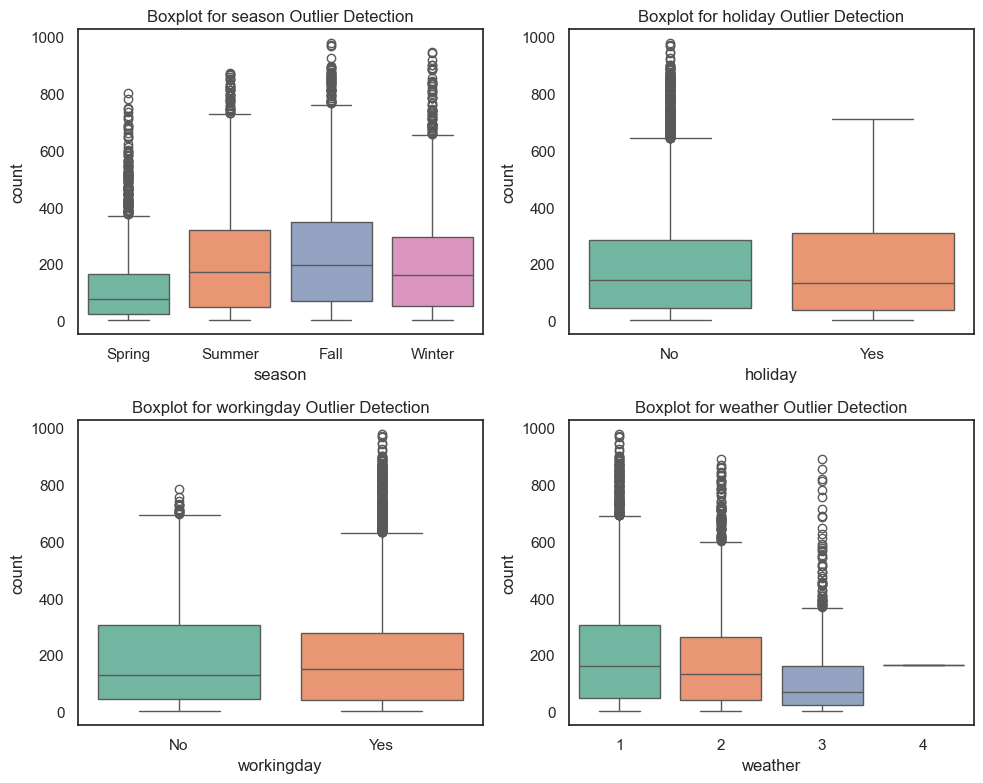

In [24]:
# Outlier Detection using Boxplots
plt.figure(figsize=(10, 8))
sns.set(style = 'white')
for i , col in enumerate(cat_cols,1):
    plt.subplot(2,2,i)
    sns.boxplot(data=data,x = col,y = 'count',palette = 'Set2')
    plt.title(f'Boxplot for {col} Outlier Detection')
plt.tight_layout()
plt.show()

<font color = 'blue'>**Observation:**</font>
1. In spring and winter there are more outliers present compared to other seasons
2. Weather 3 category has more outliers whereas, category 4 doesn't have any
3. working days vs Holidays : Regular working days has more unusual data than on holidays.

# <font color = 'purple'>2 Non-Graphical Analysis: Value counts and unique attributes:</font>

In [27]:
for column in cat_cols:
    print(f"Value counts for column '{column}':\n{data[column].value_counts()}")
    print("\n")

    print(f"Unique Count of {column} : {data[column].nunique()}")
    print("\n")


Value counts for column 'season':
season
Winter    2734
Summer    2733
Fall      2733
Spring    2686
Name: count, dtype: int64


Unique Count of season : 4


Value counts for column 'holiday':
holiday
No     10575
Yes      311
Name: count, dtype: int64


Unique Count of holiday : 2


Value counts for column 'workingday':
workingday
Yes    7412
No     3474
Name: count, dtype: int64


Unique Count of workingday : 2


Value counts for column 'weather':
weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64


Unique Count of weather : 4




# <font color = 'purple'>**3.Visual Analysis - Univariate,Bivariate**</font>

## <b><font color = 'purple'> Univariate </b></font>

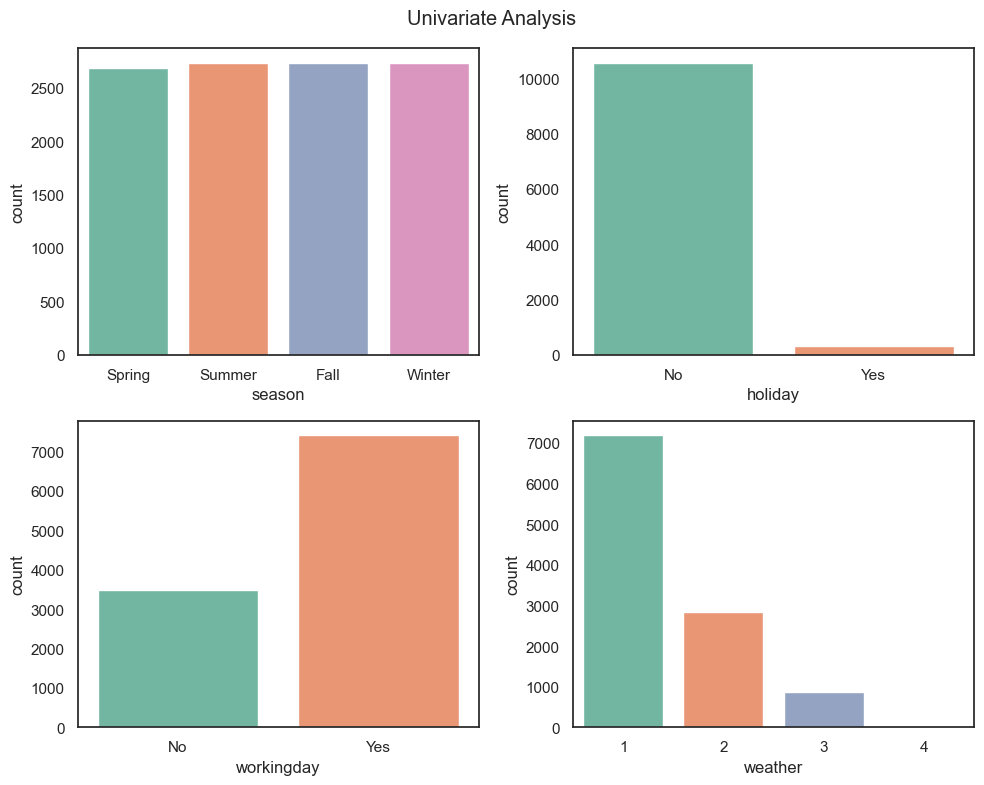

In [30]:
plt.figure(figsize=(10, 8))
sns.set(style = 'white')
for i , col in enumerate(cat_cols,1):
    plt.subplot(2,2,i)
    sns.countplot(data=data,x = col,palette = 'Set2')
    plt.suptitle('Univariate Analysis')
plt.tight_layout()
plt.show()

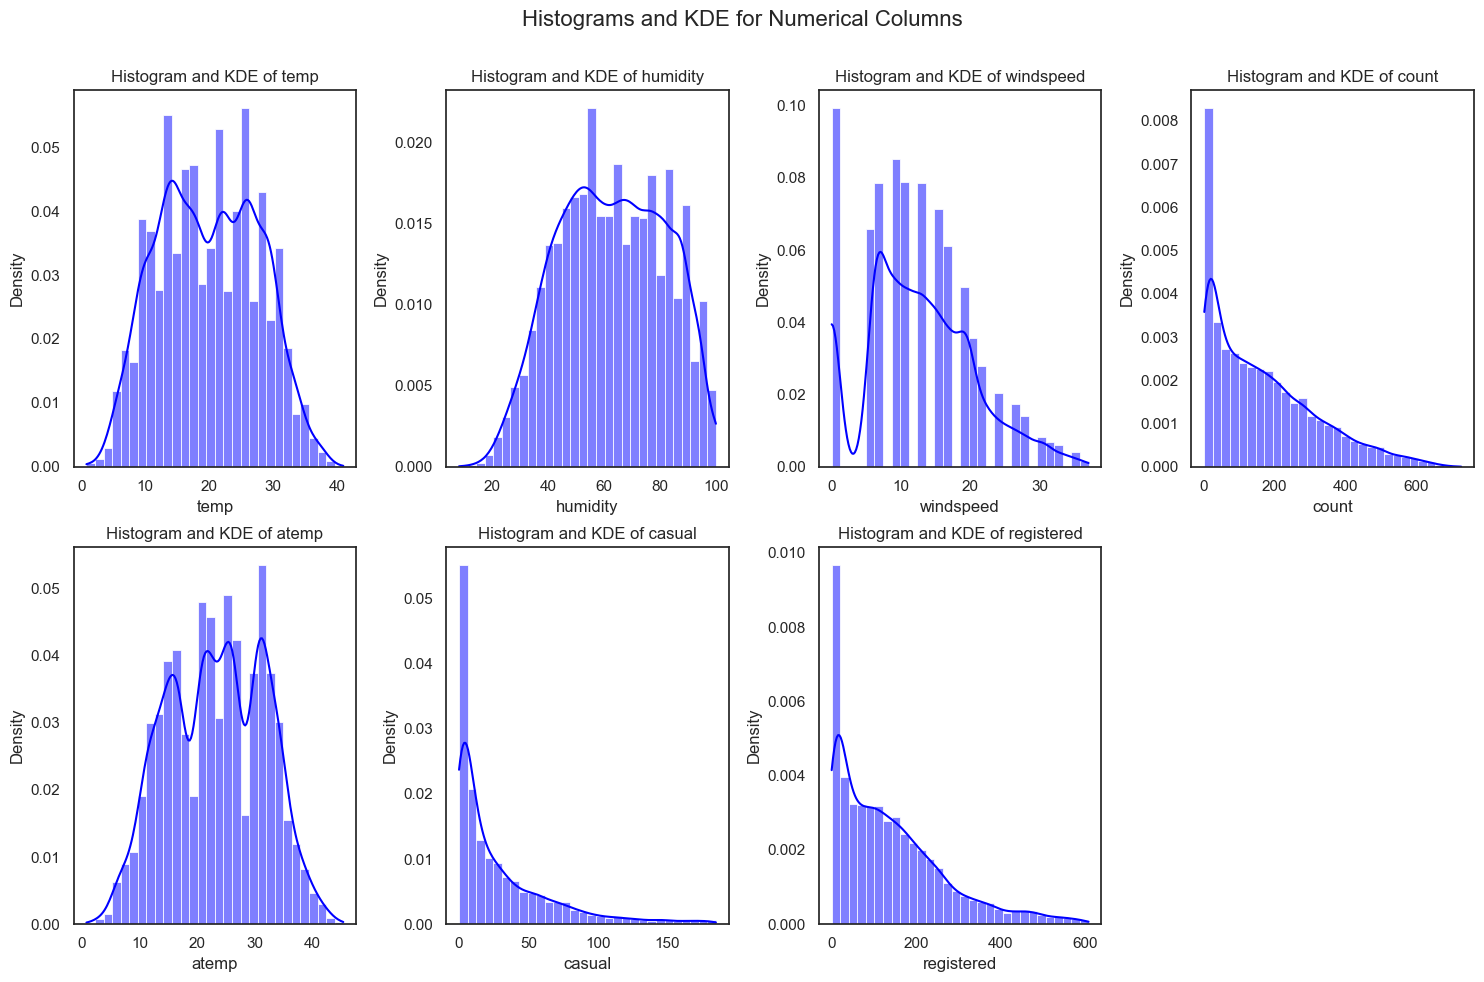

In [31]:
num_cols = ['temp', 'humidity', 'windspeed', 'count', 'atemp', 'casual', 'registered']

# 1. Histograms and KDE (overlaid)
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(2, 4, i+1)  # Create subplots in a 2x4 grid
    sns.histplot(df_clean[col], bins=30, kde=True, color='blue', stat='density')
    plt.title(f'Histogram and KDE of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
plt.tight_layout()
plt.suptitle('Histograms and KDE for Numerical Columns', fontsize=16)
plt.subplots_adjust(top=0.9)  # Adjust the title to fit within the figure
plt.show()

<font color = 'blue'>**Observation:**</font>
1.  **"count"** ,**Casual** and **Registered** columns has a right-skewed distribution, this could suggest that the majority of bike rentals are lower, with fewer days having very high rental counts.
2.  **temp** and **atemp** might show a more uniform distribution depending on the climate patterns, as temperatures in a given area typically dont vary drastically in short periods.
3. **humidity** histogram, a peak might show that certain humidity levels are more frequent.

## <b><font color = 'purple'> Bivariate </b></font>

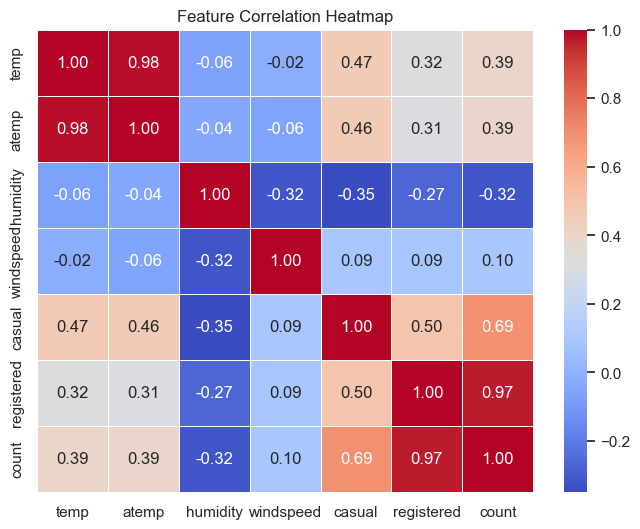

In [34]:
plt.figure(figsize=(8, 6))
numerical_data = data.select_dtypes(include=np.number)
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

<font color = 'blue'>**Observation:**</font>

1. A high positive correlation between temp and count,would suggest that bike rentals increase as the temperature rises.
3. A negative correlation might indicate that bike rentals decrease with higher wind speeds or humidity.
4. If the winter season shows lower bike rentals with less variability, it suggests that colder months are less favorable for biking.
5. If spring has more non-holiday rentals, it could indicate that people prefer biking during the spring season when the weather is milder and fewer people are on holiday.

# <b><font color = 'purple'> Hypothesis Testing </b></font>  

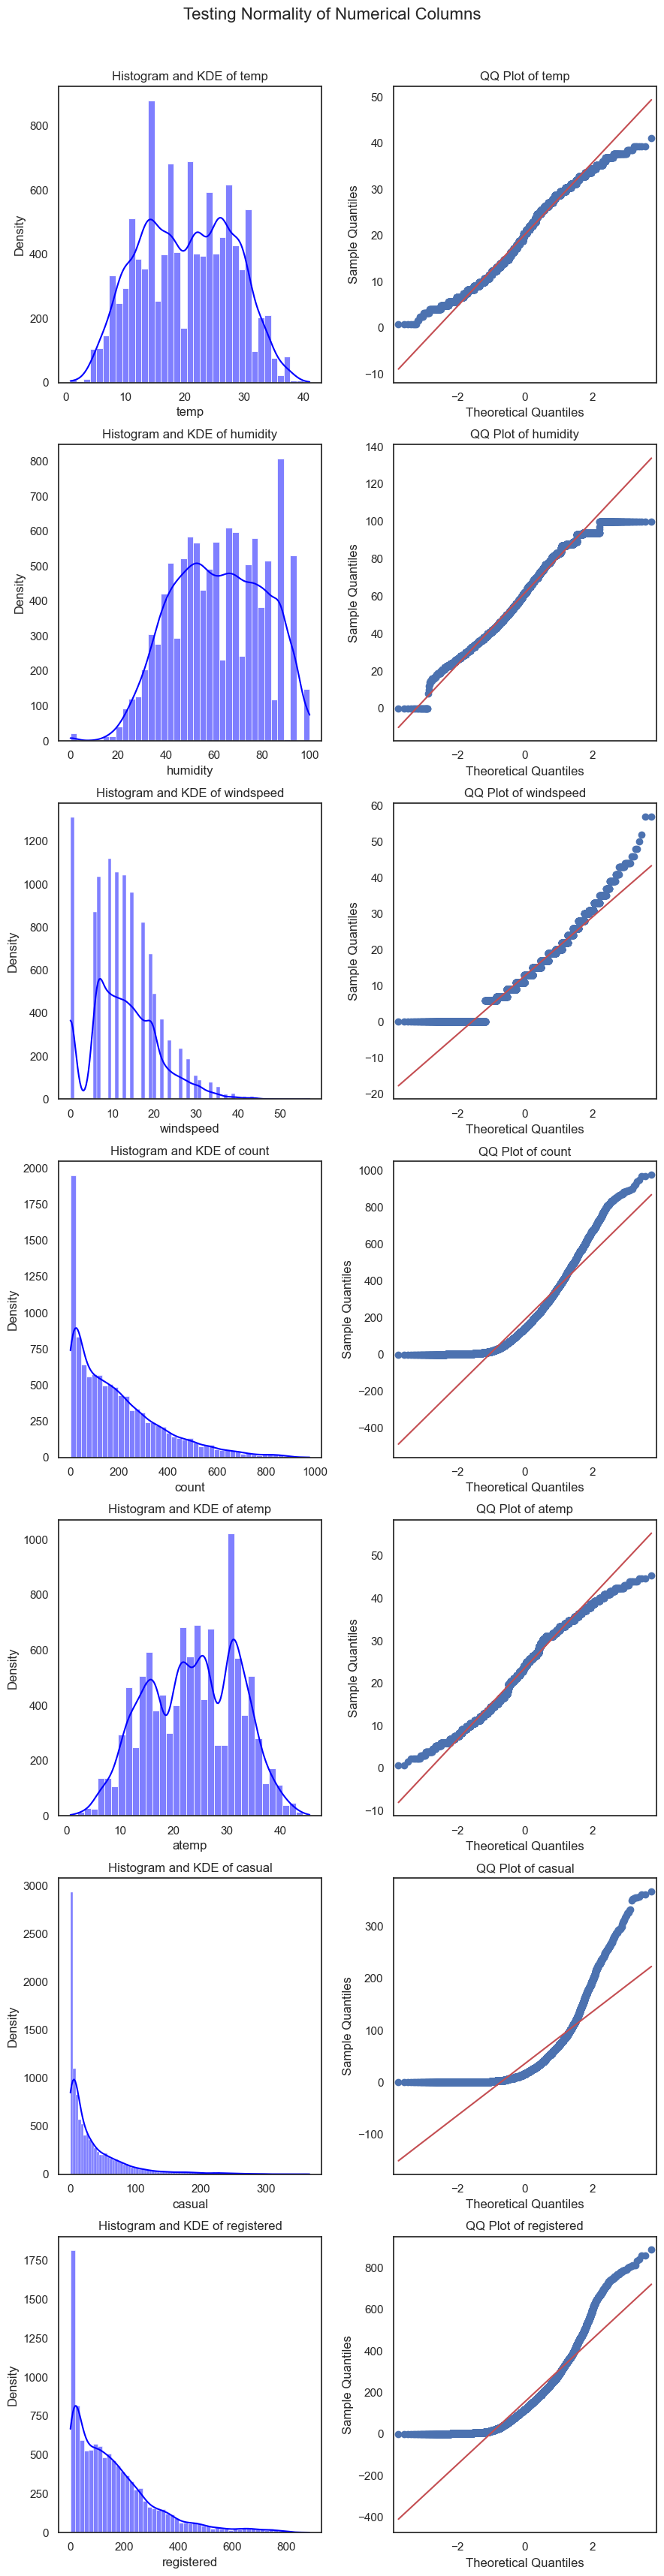

In [37]:
fig, axes = plt.subplots(len(num_cols), 2, figsize=(9, 5 * len(num_cols)))

for i, col in enumerate(num_cols):
    # Histogram with KDE
    sns.histplot(data[col], kde=True, ax=axes[i, 0], color='blue')
    axes[i, 0].set_title(f'Histogram and KDE of {col}')
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel('Density')

    # QQ Plot
    qqplot(data[col], line='s', ax=axes[i, 1])
    axes[i, 1].set_title(f'QQ Plot of {col}')

# Adjust layout
plt.tight_layout()
plt.suptitle('Testing Normality of Numerical Columns', fontsize=16)
plt.subplots_adjust(top=0.95)  # Adjust the title to fit within the figure
plt.show()

## Q1  Check if Working Day has an effect on the number of electric cycles rented?


**Set up null hypothesis(H0)& Alternative hypothesis (Ha):**
<table>
    <thead>
        <tr>
            <th colspan="2">Hypothesis Setup</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td><strong>Null Hypothesis (H0)</strong></td>
            <td>The average number of bike rentals on working days is the same as on non-working days.</td>
        </tr>
        <tr>
            <td><strong>Alternative Hypothesis (Ha)</strong></td>
            <td>The average number of bike rentals on working days is greater than on non-working days.</td>
        </tr>
    </tbody>
</table>

**Ttest_ind:**
1. The **ttest_ind** function in SciPy is used to perform an independent two-sample t-test. 
2. This test compares the means of two independent groups to determine if there is a significant difference between them.
3. It is commonly used when you want to compare the means of two distinct groups (e.g., working days vs. non-working days) to see if they differ significantly.

**Steps to perform Ttest**
1. First, you need to split the data into two groups
2. To compare the means of bike rentals on working and non-working days.
3.  p-value is less than a significance level (usually 0.05), you can reject the null hypothesis (i.e., conclude that the means are significantly different).
4.  If the p-value is greater than 0.05, you fail to reject the null hypothesis (i.e., there is no significant difference between the means).

In [40]:
working_day = data[data['workingday']=='Yes']['count']
non_working_day = data[data['workingday']=='No']['count']

In [41]:
ttest,p_value = ttest_ind(working_day,non_working_day)
print(f"p_value:{p_value} \nttest:'{ttest}")
alpha = 0.05
if p_value >= alpha:
    print("Fail to reject H0:\nThe average number of bike rentals is the same on working and non-working days.")
else:
    print("Reject H0: There is a significant difference in bike rentals between working and non-working days.")


p_value:0.22644804226361348 
ttest:'1.2096277376026694
Fail to reject H0:
The average number of bike rentals is the same on working and non-working days.


<Axes: xlabel='count', ylabel='Density'>

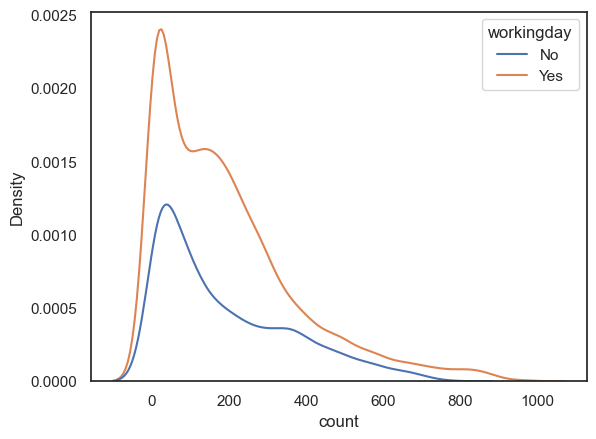

In [42]:
sns.kdeplot(data, x= 'count',hue = 'workingday')

<table>
    <thead>
        <tr>
            <th colspan="2">T-Test Results</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td><strong>Test Statistic (t)</strong></td>
            <td>1.2096277376026694</td>
        </tr>
        <tr>
            <td><strong>P-value</strong></td>
            <td>0.22644804226361348 </td>
        </tr>
        <tr>
            <td><strong>Conclusion</strong></td>
            <td>Fail to reject H0:The average number of bike rentals is the same on working and non-working days.</td>
        </tr>
    </tbody>
</table>

## Q2. Check if No. of cycles rented is similar or different in different 1. weather 2. season ?

Lets check for demand of cycles is same for different weather conditions:

**one way Anova:**

To compare means of 4 independent groups(spring,summer,fall,winter)

**Assumptions:**

1. Independence of Observations

   > *   The samples must be independent of each other.
   > *   This means that the bike rentals for one season should not influence the rentals for another season.
   > *  This condition is already satisfied since all seasons are independent of each other

2. Normality (Each Group is Normally Distributed)

   > *  The distribution of bike rentals within each season should be approximately normal.

3. Homogeneity of Variance (Equal Variances in Groups)

   > * The variance of bike rentals should be similar across all seasons.
   > * Check if all groups have same variance using Levene test

<h2>What to Do If ANOVA Assumptions Are Violated</h2>

<table>
    <tr>
        <th>Violation</th>
        <th>Solution</th>
    </tr>
    <tr>
        <td>Non-normal data</td>
        <td>Use log/sqrt transformation or Kruskal-Wallis test</td>
    </tr>
    <tr>
        <td>Unequal variances</td>
        <td>Use Welch’s ANOVA instead</td>
    </tr>
    <tr>
        <td>Dependent variable not continuous</td>
        <td>Convert count to numeric</td>
    </tr>
</table>


**Levene's Test:**

To perform Levene's test for equality of variances based on the weather variable, we need to first group the data by the weather categories (e.g., different weather conditions) and then perform the test to see if the variances of the count variable (number of bike rentals) differ across the different weather conditions.

**Set up null hypothesis(H0)& Alternative hypothesis (Ha):**

<table>
    <thead>
        <tr>
            <th colspan="2">Hypothesis Setup for levene test </th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td><strong>Null Hypothesis (H0)</strong></td>
            <td>The variances are equal</td>
        </tr>
        <tr>
            <td><strong>Alternative Hypothesis (Ha)</strong></td>
            <td>The variances are not equal</td>
        </tr>
    </tbody>
</table>

In [48]:
weather_1 = data[data['weather'] == 1]['count']
weather_2 = data[data['weather'] == 2]['count']
weather_3 = data[data['weather'] == 3]['count']
weather_4 = data[data['weather'] == 4]['count']

In [49]:
# Perform Levene's test for homogeneity of variances
stat, p_value = levene(weather_1,weather_2,weather_3,weather_4)

# Print results
print(f"Levene's Test Results:\nStatistic: {stat}, p-value: {p_value}")

# Define significance level
alpha = 0.05

# Hypothesis testing
if p_value < alpha:
    print("Reject H0:\nVariances are not equal")
else:
    print("Fail to reject H0:\nVariances are equal")

Levene's Test Results:
Statistic: 54.85106195954556, p-value: 3.504937946833238e-35
Reject H0:
Variances are not equal


<table>
    <thead>
        <tr>
            <th colspan="2">Levene's Test Results for  Weather </th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td><strong>Levene Test Statistic</strong></td>
            <td>54.85106195954556</td> 
        </tr>
        <tr>
            <td><strong>P-value</strong></td>
            <td>3.504937946833238e-35</td> 
        </tr>
        <tr>
            <td><strong>Conclusion</strong></td>
            <td>Reject H0: Variances are not equal.</td> 
        </tr>
    </tbody>
</table>

Two of three conditions of **anova** are not met,still perform anova

**Set up null hypothesis(H0)& Alternative hypothesis (Ha):**

<table>
    <thead>
        <tr>
            <th colspan="2">Hypothesis Setup</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td><strong>Null Hypothesis (H0)</strong></td>
            <td>No significant demand of bicycles for different weather conditions</td>
        </tr>
        <tr>
            <td><strong>Alternative Hypothesis (Ha)</strong></td>
            <td>significant demand of bicycles for different weather conditions</td>
        </tr>
    </tbody>
</table>

In [52]:
an_stat,p_value = f_oneway(weather_1,weather_2,weather_3,weather_4) 
print(f"Anova Test Results:\nStatistic: {an_stat}, p-value: {p_value}")
alpha = 0.05
if p_value < alpha:
    print("Reject H0:\nsignificant demand of bicycles for different weather conditions.")
else:
    print("Fail to reject H0:\n No significant demand of bicycles for different weather conditions.")

Anova Test Results:
Statistic: 65.53024112793271, p-value: 5.482069475935669e-42
Reject H0:
significant demand of bicycles for different weather conditions.


<table>
    <thead>
        <tr>
            <th colspan="2">Anova test Results</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td><strong>Anova statistic</strong></td>
            <td>65.53024112793271</td>
        </tr>
        <tr>
            <td><strong>P-value</strong></td>
            <td>5.482069475935669e-42</td>
        </tr>
        <tr>
            <td><strong>Conclusion</strong></td>
            <td>Reject H0: There is significant demand of bicycles for different weather conditions.</td>
        </tr>
    </tbody>
</table>

**Kruskal-Wallis Test**

The **Kruskal-Wallis** Test is a non-parametric method used to compare three or more independent groups to determine if there is a statistically significant difference in the medians of the groups. This test is the non-parametric equivalent to one-way ANOVA and does not assume a normal distribution of the data.


In [55]:
stat, p_value = kruskal(weather_1, weather_2, weather_3, weather_4)
print(f"Kruskal-Wallis Test Results:\nStatistic: {stat}, p-value: {p_value}")
if p_value < alpha:
    print("Reject H0: \nAverage number of bikes rented is diferent for different weather conditions.")
else:
    print("Fail to reject H0:\n Average number of bikes rented is same for different conditions")

Kruskal-Wallis Test Results:
Statistic: 205.00216514479087, p-value: 3.501611300708679e-44
Reject H0: 
Average number of bikes rented is diferent for different weather conditions.


Hence pvalue is smaller than the significance level,Reject H0.

Therefore, significant demand of bicycles on different weather conditions

Lets check for demand of cycles is same for different weather conditions:

**Set up null hypothesis(H0)& Alternative hypothesis (Ha):**

<table>
    <thead>
        <tr>
            <th colspan="2">Hypothesis Setup</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td><strong>Null Hypothesis (H0)</strong></td>
            <td>Average number of bikes rented is same for all seasons</td>
        </tr>
        <tr>
            <td><strong>Alternative Hypothesis (Ha)</strong></td>
            <td>Average number of bikes rented differ for atleast one season.</td>
        </tr>
    </tbody>
</table>



**Set up null hypothesis(H0)& Alternative hypothesis (Ha):**

<table>
    <thead>
        <tr>
            <th colspan="2">Hypothesis Setup for levene test </th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td><strong>Null Hypothesis (H0)</strong></td>
            <td>The variances are equal</td>
        </tr>
        <tr>
            <td><strong>Alternative Hypothesis (Ha)</strong></td>
            <td>The variances are not equal</td>
        </tr>
    </tbody>
</table>

In [60]:
spring = data[data['season'] == 'Spring']['count']
summer = data[data['season'] == 'Summer']['count']
fall = data[data['season'] == 'Fall']['count']
winter = data[data['season'] == 'Winter']['count']
stat, p_value = levene(spring, summer, fall, winter)
print(f"Levene's Test Results:\nStatistic: {stat}, p-value: {p_value}")
alpha = 0.05
if p_value < alpha:
    print("Reject H0:\nVariances are not equal across seasons.")
else:
    print("Fail to reject H0:\nVariances are equal across seasons.")

Levene's Test Results:
Statistic: 187.7706624026276, p-value: 1.0147116860043298e-118
Reject H0:
Variances are not equal across seasons.


<table>
    <thead>
        <tr>
            <th colspan="2">Levene test Results</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td><strong>Levene Test</strong></td>
            <td>187.7706624026276</td>
        </tr>
        <tr>
            <td><strong>P-value</strong></td>
            <td>1.0147116860043298e-118 </td>
        </tr>
        <tr>
            <td><strong>Conclusion</strong></td>
            <td>Fail to reject H0:Variances are not equal across seasons..</td>
        </tr>
    </tbody>
</table>

**Set up null hypothesis(H0)& Alternative hypothesis (Ha):**

<table>
    <thead>
        <tr>
            <th colspan="2">Hypothesis Setup</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td><strong>Null Hypothesis (H0)</strong></td>
            <td>No significant demand of bicycles for different seasons</td>
        </tr>
        <tr>
            <td><strong>Alternative Hypothesis (Ha)</strong></td>
            <td>significant demand of bicycles for different seasons</td>
        </tr>
    </tbody>
</table>

In [63]:
an_stat,p_value = f_oneway(spring, summer, fall, winter)
print(f"Anova Test Results:\nStatistic: {an_stat}, p-value: {p_value}")
alpha = 0.05
if p_value < alpha:
    print("Reject H0:\nsignificant demand of bicycles for different weather conditions.")
else:
    print("Fail to reject H0:\n No significant demand of bicycles for different weather conditions.")

Anova Test Results:
Statistic: 236.94671081032106, p-value: 6.164843386499654e-149
Reject H0:
significant demand of bicycles for different weather conditions.


<table>
    <thead>
        <tr>
            <th colspan="2">Anova test Results</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td><strong>Anova statistic</strong></td>
            <td>236.94671081032106</td>
        </tr>
        <tr>
            <td><strong>P-value</strong></td>
            <td>6.164843386499654e-149</td>
        </tr>
        <tr>
            <td><strong>Conclusion</strong></td>
            <td>Reject H0: There is significant demand of bicycles for different weather conditions.</td>
        </tr>
    </tbody>
</table>

**Kruskal-Wallis Test**

The **Kruskal-Wallis** Test is a non-parametric method used to compare three or more independent groups to determine if there is a statistically significant difference in the medians of the groups. This test is the non-parametric equivalent to one-way ANOVA and does not assume a normal distribution of the data.


In [66]:
stat, p_value = kruskal(spring, summer, fall, winter)
print(f"Kruskal-Wallis Test Results:\nStatistic: {stat}, p-value: {p_value}")
if p_value < alpha:
    print("Reject H0: \nAverage number of bikes rented is diferent for different seasons.")
else:
    print("Fail to reject H0:\n Average number of bikes rented is same for different seasons")

Kruskal-Wallis Test Results:
Statistic: 699.6668548181988, p-value: 2.479008372608633e-151
Reject H0: 
Average number of bikes rented is diferent for different seasons.


Here pvalue is smaller than significance level,Reject H0

Therefore, conclude that there is a significant difference between demand of cycles for different seasons

## Q3. Check if Weather is dependent on the season

**Chisquare Test:**

The chisquare function in Python (from scipy.stats) is used to perform the Chi-Square test. The Chi-Square test is often used for hypothesis testing in categorical data, to determine whether there is a significant difference between the expected and observed frequencies.

**There are two common types of Chi-Square tests:**

1. Chi-Square Goodness of Fit Test: Tests whether the observed data follows a specified distribution.
2. Chi-Square Test of Independence: Tests whether two categorical variables are independent or associated.

**Set up null hypothesis(H0)& Alternative hypothesis (Ha):**

<table>
    <thead>
        <tr>
            <th colspan="2">Hypothesis Setup</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td><strong>Null Hypothesis (H0)</strong></td>
            <td>Weather and Season are independent.There is no stastically significant difference on average number of rentals between working and non working days.
</td>
        </tr>
        <tr>
            <td><strong>Alternative Hypothesis (Ha)</strong></td>
            <td>Weather is dependent.There is no stastically significant difference on average number of rentals between working and non working days.</td>
        </tr>
    </tbody>
</table>

**Chisquare test of independence: relationship between 2 categorical variable**

In [70]:
weather_season = pd.crosstab(data['weather'],data['season'],)
print("Observed Values are as follows:\n")
weather_season

Observed Values are as follows:



season,Spring,Summer,Fall,Winter
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


In [71]:
stat, p, dof, expected= chi2_contingency(weather_season)
print(f"Chi-Square Test Results:\nChi square Test Statistic: {stat},\np-value: {p},\nDegrees of Freedom: {dof}")
print("\nExpected Values are as follows:")
print(expected)
alpha = 0.05
print(f"\nCritical value:{chi2.ppf(1 - alpha,df = dof)}")

if p < alpha:
    print("\nReject H0:\nWeather and Season are dependent.")
else:
    print("\nFail to reject H0:\nWeather and Season are independent.")

Chi-Square Test Results:
Chi square Test Statistic: 49.15865559689363,
p-value: 1.5499250736864862e-07,
Degrees of Freedom: 9

Expected Values are as follows:
[[1.77454639e+03 1.80559765e+03 1.80559765e+03 1.80625831e+03]
 [6.99258130e+02 7.11493845e+02 7.11493845e+02 7.11754180e+02]
 [2.11948742e+02 2.15657450e+02 2.15657450e+02 2.15736359e+02]
 [2.46738931e-01 2.51056403e-01 2.51056403e-01 2.51148264e-01]]

Critical value:16.918977604620448

Reject H0:
Weather and Season are dependent.


Here is the text version of the content:

---

### Chi-Square Test Results

| **Chi-Square Test Statistic** | **P-Value** | **Degrees of Freedom** | **Critical Value** |
|-------------------------------|-------------|------------------------|---------------------|
| 49.16                         | 1.55e-07    | 9                      | 16.92               |

---

### Expected Values

| 1774.55 | 1805.60 | 1805.60 | 1806.26 |
|---------|---------|---------|---------|
| 699.26  | 711.49  | 711.49  | 711.75  |
| 211.95  | 215.66  | 215.66  | 215.74  |
| 0.25    | 0.25    | 0.25    | 0.25    |

---

### Conclusion

**Reject H₀:** Weather and Season are dependent.

---

This text summarizes the results of the Chi-Square test, including the test statistic, p-value, degrees of freedom, and critical value. It also provides the expected values and concludes that the null hypothesis is rejected, indicating that weather and season are dependent.

In [73]:
data['datetime'] = pd.to_datetime(data['datetime'])
data['datetime'] = pd.to_datetime(data['datetime'])
data['hour'] = data['datetime'].dt.hour
data['day'] = data['datetime'].dt.day
data['month'] = data['datetime'].dt.month
data['year'] = data['datetime'].dt.year
data['weekday'] = data['datetime'].dt.weekday

In [74]:

# Step 2: Drop any string columns like 'season' if they contain text (e.g., 'Fall')
# Keep only numeric columns
data = data.select_dtypes(include=['number'])

# Step 3: Define features and target
X = data.drop(columns=['count'])  # All numeric columns except target
y = data['count']

# Step 4: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Predict and Evaluate
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Simple Linear Regression Results:")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Simple Linear Regression Results:
RMSE: 0.00
R² Score: 1.0000


In [75]:
class BikeDemandAgent:
    """
    A simple agent that learns to predict bike demand based on environmental factors.
    """
    def __init__(self):
        """
        Initializes the agent, the model, and data columns.
        """
        self.model = LinearRegression()
        self.preprocessed_columns = None
        print("Agent initialized........\n")

    def _preprocess_data(self, df):
        """
        Prepares the raw data from the CSV file for the learning model.
        This involves converting the 'datetime' column and creating dummy variables
        for categorical features.
        """
        print("****Preprocessing data*****")
        # Convert datetime column to datetime objects
        df['datetime'] = pd.to_datetime(df['datetime'])

        # Extract useful features from the datetime column
        df['hour'] = df['datetime'].dt.hour
        df['day_of_week'] = df['datetime'].dt.dayofweek
        df['month'] = df['datetime'].dt.month
        
        # Select features and target
        features = ['season', 'holiday', 'workingday', 'weather', 
                    'temp', 'atemp', 'humidity', 'windspeed', 
                    'hour', 'day_of_week', 'month']
        target = 'count'

        # One-hot encode categorical features : This converts categorical variables into a format that the model can understand.
        df_processed = pd.get_dummies(df[features], columns=['season', 'weather', 'day_of_week', 'month'], drop_first=True)
        
        # Store the column order after creating dummies to ensure consistency for predictions
        self.preprocessed_columns = df_processed.columns
        
        X = df_processed
        y = df[target]
        
        print("Data preprocessing complete.......")
        return X, y

    def learn_from_environment(self, file_path):
        """
        Loads data from the environment (CSV file), preprocesses it,
        and trains the model.
        """
        print(f"Loading environment data from: {file_path}\n")
        try:
            df = pd.read_csv(file_path)
        except FileNotFoundError:
            print(f"Error: The file '{file_path}' was not found.\n")
            return

        X, y = self._preprocess_data(df)

        # Split data into a training set (for learning) and a testing set (for evaluation)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        print("Agent is learning...")
        # The 'fit' method is where the agent learns the relationship between inputs and outputs
        self.model.fit(X_train, y_train)
        print("Learning complete.")

        # Evaluate the agent's performance
        self.evaluate(X_test, y_test)

    def evaluate(self, X_test, y_test):
        """
        Evaluates the agent's learned knowledge on unseen data.
        """
        print("\nEvaluating agent's performance on new data...")
        predictions = self.model.predict(X_test)
        mse = mean_squared_error(y_test, predictions)
        rmse = np.sqrt(mse)
        
        print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
        print("This metric represents the average error in the agent's predictions. Lower is better.")

    def make_decision(self, input_data):
        """
        Makes a prediction based on new, unseen conditions.
        Args:
            input_data (dict): A dictionary representing a single observation of the environment.
                               Example: 
                               {
                                   'season': 1, 'holiday': 0, 'workingday': 1, 
                                   'weather': 1, 'temp': 15, 'atemp': 18, 
                                   'humidity': 60, 'windspeed': 10, 'hour': 8,
                                   'day_of_week': 1, 'month': 4
                               }
        
        Returns:
            float: The predicted bike count.
        """
        if self.preprocessed_columns is None:
            print("****Error: The agent has not learned from the environment yet. Call 'learn_from_environment' first.****")
            return None
            
        print("\nAgent is making a decision based on new input...\n")
        # Create a pandas DataFrame from the input dictionary
        input_df = pd.DataFrame([input_data])
        
        # One-hot encode the input data using the same categories as the training data
        input_processed = pd.get_dummies(input_df)
        
        # Reindex the input to match the columns the model was trained on
        # This ensures that any missing dummy columns from the single input are added and filled with 0
        input_aligned = input_processed.reindex(columns=self.preprocessed_columns, fill_value=0)
        
        # Make the prediction
        prediction = self.model.predict(input_aligned)
        
        # Return a clean, non-negative integer
        predicted_count = max(0, int(prediction[0]))
        print(f"Decision: The agent predicts a demand of {predicted_count} bikes.\n")
        return predicted_count


# --- Main execution block to demonstrate the agent ---
if __name__ == "__main__":
    # 1. Create an instance of our agent
    agent = BikeDemandAgent()

    # 2. The agent learns from its environment (the CSV file)
    #    Make sure 'yulu.csv' is in the same directory as this script.
    agent.learn_from_environment('yulu.csv')

    # 3. Ask the agent to make a decision based on a new, hypothetical situation.
    #    Let's define a scenario:
    #    - season: 2 (spring)
    #    - holiday: 0 (not a holiday)
    #    - workingday: 1 (it's a workday)
    #    - weather: 1 (clear)
    #    - temp: 25 degrees Celsius
    #    - atemp: 28 degrees (feels like)
    #    - humidity: 50%
    #    - windspeed: 15
    #    - hour: 17 (5 PM)
    #    - day_of_week: 4 (Friday)
    #    - month: 5 (May)
    new_scenario = {
        'season': 2, 'holiday': 0, 'workingday': 1, 'weather': 1,
        'temp': 25, 'atemp': 28, 'humidity': 50, 'windspeed': 15,
        'hour': 17, 'day_of_week': 4, 'month': 5
    }
    
    agent.make_decision(new_scenario)


Agent initialized........

Loading environment data from: yulu.csv

****Preprocessing data*****
Data preprocessing complete.......
Agent is learning...
Learning complete.

Evaluating agent's performance on new data...
Root Mean Squared Error (RMSE): 145.20
This metric represents the average error in the agent's predictions. Lower is better.

Agent is making a decision based on new input...

Decision: The agent predicts a demand of 300 bikes.



**Insights**
1. Bike rentals are higher in warmer months, especially during the summer and fall. The demand tends to decrease significantly in the colder winter months.
2. Bike rentals tend to increase on holidays.
3. Similarly, bike rentals are slightly higher on weekends or holidays, as indicated by the "working day" variable.
4. Rainy days, thunderstorms, snow, and fog lead to a notable drop in bike rentals. Bad weather conditions reduce the willingness of people to rent bikes due to comfort and safety concerns.
5. When humidity levels drop below 20%, the number of bikes rented is significantly lower.
6. On days when the temperature is below 10°C, bike rentals are also lower.
7. If wind speeds exceed 35 km/h, bike rentals decrease.
8. Rentals are higher during public holidays and weekends. People are more likely to rent bikes for recreational purposes or short trips when they have more free time.

**Recommendations**
1. During the summer and fall seasons, the company should increase its bike stock to meet the higher demands.
2. Based on a significance level of 0.05, the "working day" variable does not significantly impact the number of cycles rented.
3. On days with very low humidity, the company should reduce the number of cycles available for rent.
4. On days with temperatures below 10°C or in very cold weather, the company should decrease its cycle stock.
5. During periods of high winds (greater than 35 km/h) or adverse weather conditions such as thunderstorms, the company should have fewer bikes available for rent.
6. On rainy, snowy, or foggy days, the company should either reduce the number of bikes available or implement a flexible booking policy where users can cancel or reschedule without penalties.
7. Incorporate weather forecasts into fleet management practices, so bikes can be redistributed based on predicted weather conditions, ensuring a balance between availability and demand.
8.  Use weather and seasonality data to design targeted marketing campaigns that promote bike rentals in favorable conditions (e.g., sunny days) and offer special promotions during slower periods (e.g., rainy days).
